In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from bayes_utils import visualize_BN, simulation_auto, simulate_joint_dist, simulation_marginals

import matplotlib
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

In [2]:
# 0:E, 1:B, 2:A, 3: R, 4:C

# E -> Earthquake
# B -> Burglary
# A -> Alarm
# R -> Radio
# C -> Cat

In [3]:
dep = {0:(), 1:(), 2:(0,1), 3:(0,), 4:(2,)}
dep_names_explicit = {'Earthquake':(), 'Burglar':(), 'Alarm':('Earthquake','Burglar'), 'Radio':('Earthquake',), 'Call':('Alarm',)}
dep_names = {'E':(), 'B':(), 'A':('E','B'), 'R':('E',), 'C':('A',)}

In [4]:
variables = ['E', 'B', 'A', 'R', 'C']
dep = {0:(), 1:(), 2:(0,1), 3:(0,), 4:(2,)}
probs = {'E': [0.99, 0.01], 'B': [0.8, 0.2], 'A': [[0.86, 0.14], [0.03, 0.97], [0.1, 0.9], [0.01, 0.99]], 'R': [[0.95, 0.05], [0.4, 0.6]], 'C': [[0.99, 0.01], [0.3, 0.7]]}
data_sizes = [5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
n = 100

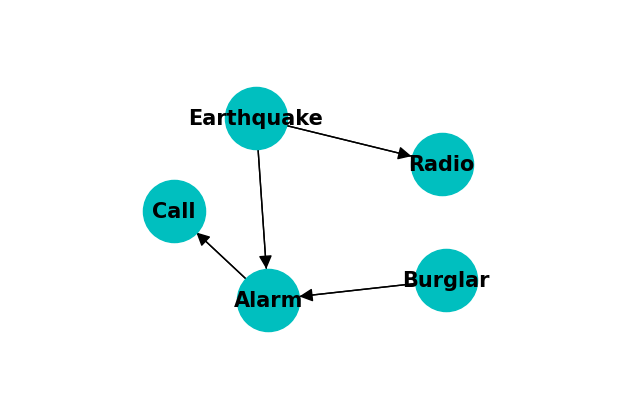

In [5]:
visualize_BN(dependency_dict = dep_names_explicit, fig_name = 'alarm.pdf')

In [6]:
kl_divs = simulation_auto(variables = variables, dependency = dep, probs = probs, n = n, data_sizes = data_sizes, output = 'kl', algorithm='exact')
accs = simulation_auto(variables = variables, dependency = dep, probs = probs, n = n, data_sizes = data_sizes, output = 'accuracy', algorithm='exact')

kl_divs_approx = simulation_auto(variables = variables, dependency = dep, probs = probs, n = n, data_sizes = data_sizes, output = 'kl', algorithm = 'chow-liu')
accs_approx = simulation_auto(variables = variables, dependency = dep, probs = probs, n = n, data_sizes = data_sizes, output = 'accuracy', algorithm = 'chow-liu')

100%|██████████| 11/11 [00:07<00:00,  1.52it/s]


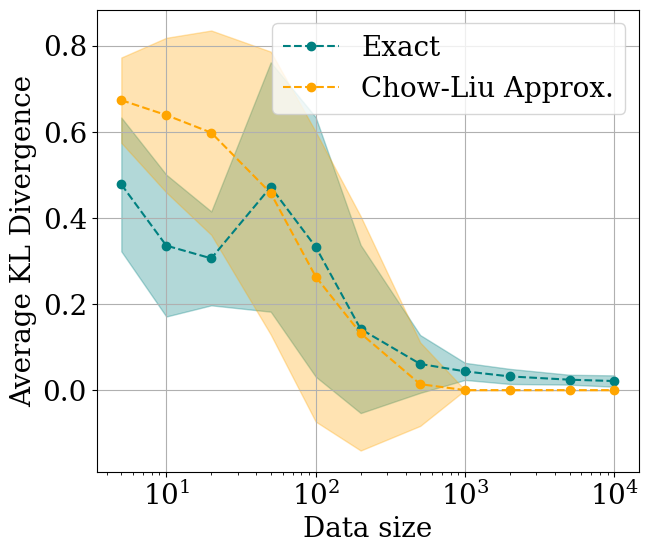

In [7]:
plt.figure(figsize=(7, 6))
plt.plot(data_sizes, kl_divs.mean(axis=1), '--o', color = 'teal', label = 'Exact')
plt.fill_between(data_sizes, kl_divs.mean(axis=1) - kl_divs.std(axis=1), kl_divs.mean(axis=1) + kl_divs.std(axis=1), alpha=0.3, color = 'teal')
plt.plot(data_sizes, kl_divs_approx.mean(axis=1), '--o', color = 'orange', label = 'Chow-Liu Approx.')
plt.fill_between(data_sizes, kl_divs_approx.mean(axis=1) - kl_divs_approx.std(axis=1), kl_divs_approx.mean(axis=1) + kl_divs_approx.std(axis=1), alpha=0.3, color = 'orange')
plt.xlabel('Data size')
plt.ylabel('Average KL Divergence')
plt.xscale('log')
plt.grid()
plt.legend()
plt.savefig('kl_divergence.pdf', bbox_inches='tight')

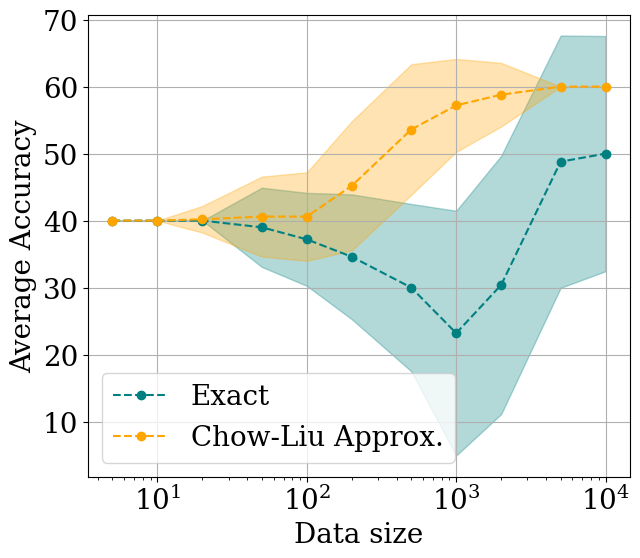

In [8]:
plt.figure(figsize=(7, 6))
plt.plot(data_sizes, accs.mean(axis=1), '--o', color = 'teal', label = 'Exact')
plt.fill_between(data_sizes, accs.mean(axis=1) - accs.std(axis=1), accs.mean(axis=1) + accs.std(axis=1), alpha=0.3, color = 'teal')
plt.plot(data_sizes, accs_approx.mean(axis=1), '--o', color = 'orange', label = 'Chow-Liu Approx.')
plt.fill_between(data_sizes, accs_approx.mean(axis=1) - accs_approx.std(axis=1), accs_approx.mean(axis=1) + accs_approx.std(axis=1), alpha=0.3, color = 'orange')
plt.xlabel('Data size')
plt.ylabel('Average Accuracy')
plt.xscale('log')
plt.grid()
plt.legend()
plt.savefig('accuracy.pdf', bbox_inches='tight')

### Comparing Joint Distributions from samples

In [9]:
joint_dist_div = simulate_joint_dist(data_sizes = data_sizes, variables = variables, probs = probs, dependency = dep, n = n, algorithm='exact')
joint_dist_div_approx = simulate_joint_dist(data_sizes = data_sizes, variables = variables, probs = probs, dependency = dep, n = n, algorithm = 'chow-liu')

100%|██████████| 11/11 [03:50<00:00, 20.94s/it]


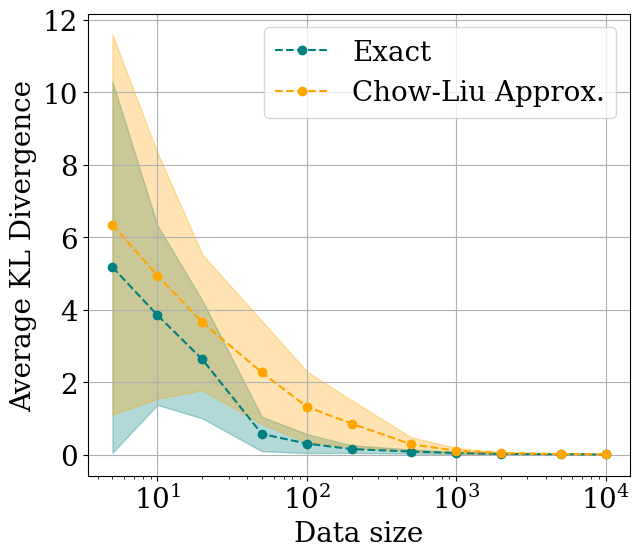

In [10]:
plt.figure(figsize=(7, 6))
plt.plot(data_sizes, joint_dist_div.mean(axis=1), '--o', color = 'teal',label = 'Exact')
plt.fill_between(data_sizes, joint_dist_div.mean(axis=1) - joint_dist_div.std(axis=1), joint_dist_div.mean(axis=1) + joint_dist_div.std(axis=1), alpha=0.3, color = 'teal')
plt.plot(data_sizes, joint_dist_div_approx.mean(axis=1), '--o', color = 'orange', label = 'Chow-Liu Approx.')
plt.fill_between(data_sizes, joint_dist_div_approx.mean(axis=1) - joint_dist_div_approx.std(axis=1), joint_dist_div_approx.mean(axis=1) + joint_dist_div_approx.std(axis=1), alpha=0.3, color = 'orange')
plt.xlabel('Data size')
plt.ylabel('Average KL Divergence')
plt.xscale('log')
plt.grid()
plt.legend()
plt.savefig('joint_dist_div.pdf', bbox_inches='tight')

### KL Divergence of marginals

In [11]:
marginals_kl_divs = simulation_marginals(variables = variables, dependency = dep, probs = probs, n = n, data_sizes = data_sizes, algorithm = 'exact')
marginals_kl_divs_approx = simulation_marginals(variables = variables, dependency = dep, probs = probs, n = n, data_sizes = data_sizes, algorithm = 'chow-liu')

100%|██████████| 11/11 [04:23<00:00, 23.91s/it]


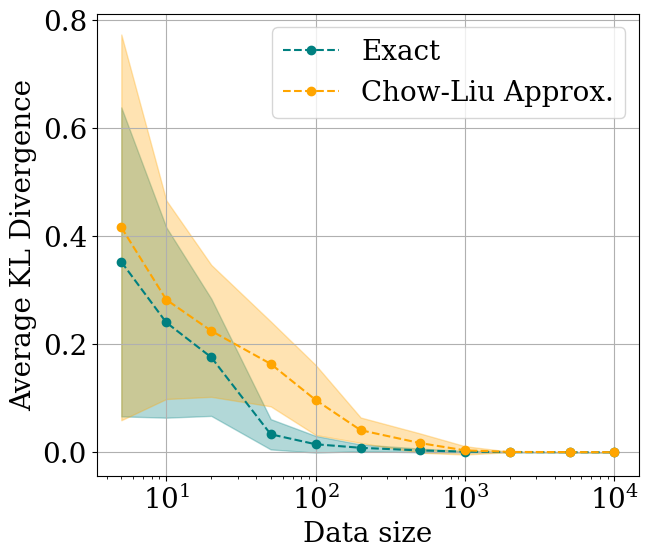

In [13]:
plt.figure(figsize=(7, 6))
plt.plot(data_sizes, marginals_kl_divs.mean(axis=1), '--o', label = 'Exact', color = 'teal')
plt.fill_between(data_sizes, marginals_kl_divs.mean(axis=1) - marginals_kl_divs.std(axis=1), marginals_kl_divs.mean(axis=1) + marginals_kl_divs.std(axis=1), alpha=0.3, color = 'teal')
plt.plot(data_sizes, marginals_kl_divs_approx.mean(axis=1), '--o', label = 'Chow-Liu Approx.', color = 'orange')
plt.fill_between(data_sizes, marginals_kl_divs_approx.mean(axis=1) - marginals_kl_divs_approx.std(axis=1), marginals_kl_divs_approx.mean(axis=1) + marginals_kl_divs_approx.std(axis=1), alpha=0.3, color = 'orange')
plt.xlabel('Data size')
plt.ylabel('Average KL Divergence')
plt.xscale('log')
plt.grid()
plt.legend()
plt.savefig('marginals_kl_divergence.pdf', bbox_inches='tight')